# EXERCISE 3

Using the data of Exercise 2, estimate the scores for all the observations by projecting the input variables onto the space spanned by the first 2 PCs estimated on the first m = 40 data.

In [7]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the dataset
data = pd.read_csv('ESE05_ex2.csv')

# Print the first 5 rows of the dataset
data.head()

,Ph1,Ph2,Ph3
0,0.801765,1.224439,0.460368
1,1.529265,2.354552,0.512780
2,-0.767775,0.185170,-0.669498
3,0.983894,1.103092,0.237085
4,0.678907,1.879489,0.279479


In [8]:
# Extract a subset of the data with only the first 40 rows
data40 = data.iloc[:40, :]

# Print the size of the new dataset
print(data40.describe())

             Ph1        Ph2        Ph3
count  40.000000  40.000000  40.000000
mean    0.670381   1.893018   0.197875
std     0.776173   0.944301   0.557657
min    -1.152475   0.185170  -0.887846
25%     0.071758   1.275474  -0.088188
50%     0.733344   1.824113   0.314454
75%     1.127810   2.596343   0.527662
max     2.508370   4.136243   1.710663


In [9]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data40_std = (data40 - data40.mean()) / data40.std()

data40_std.describe()

,Ph1,Ph2,Ph3
count,4.000000e+01,4.000000e+01,40.000000
mean,-1.110223e-16,1.443290e-16,0.000000
std,1.000000e+00,1.000000e+00,1.000000
min,-2.348518e+00,-1.808585e+00,-1.946935
25%,-7.712494e-01,-6.539699e-01,-0.512973
50%,8.112069e-02,-7.296887e-02,0.209050
75%,5.893392e-01,7.448102e-01,0.591380
max,2.368016e+00,2.375541e+00,2.712758


In [10]:
# import the libraries for PCA
from sklearn.decomposition import PCA

# Create the PCA object
pca_std = PCA()
# Fit the PCA object to the data
pca_std.fit(data40_std)
# Print the eigenvalues
print("Eigenvalues \n", pca_std.explained_variance_)
# Print the eigenvectors
print("\nEigenvectors \n", pca_std.components_)
# Print the explained variance ratio
print("\nExplained variance ratio \n", pca_std.explained_variance_ratio_)
# Print the cumulative explained variance ratio
print("\nCumulative explained variance ratio \n", np.cumsum(pca_std.explained_variance_ratio_))


Eigenvalues 
 [2.26040708 0.63278177 0.10681116]

Eigenvectors 
 [[ 0.63109812  0.47862724  0.6104352 ]
 [-0.25959246  0.87188528 -0.41524428]
 [ 0.73097669 -0.10359551 -0.67449318]]

Explained variance ratio 
 [0.75346903 0.21092726 0.03560372]

Cumulative explained variance ratio 
 [0.75346903 0.96439628 1.        ]


> Plot the scree plot to compare the eigenvalues.

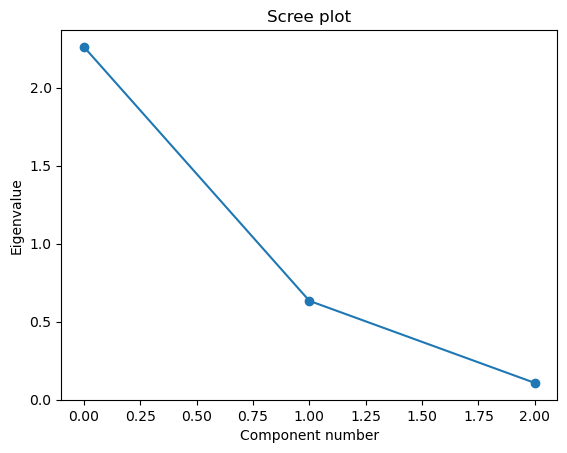

In [11]:
# Plot the eigenvalues (scree plot)
plt.plot(pca_std.explained_variance_, 'o-')
plt.xlabel('Component number')
plt.ylabel('Eigenvalue')
plt.title('Scree plot')
plt.show()

> Now compute the scores for all the observations by projecting the input variables onto the space spanned by the first 2 PCs estimated on the first m = 40 data.
>
> In case of PCA on the non-standardized data:
> $$ \mathbf{z_i} = (\mathbf{X} - \bar{\mathbf{x}}) \mathbf{u_i}, \ i = 1,2 $$
>
> In case of PCA on the standardized data:
> $$ \mathbf{z_i} = \mathbf{X}^* \mathbf{u_i}, \ i = 1,2 $$
> where $\mathbf{X}^*$ is the standardized data matrix.


In [12]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
data_std = (data - data40.mean()) / data40.std()

data_std.describe()

,Ph1,Ph2,Ph3
count,50.000000,50.000000,50.000000
mean,-0.014128,-0.051510,-0.069929
std,0.912933,1.022038,0.930891
min,-2.348518,-1.808585,-1.946935
25%,-0.509515,-0.804393,-0.582474
50%,0.013467,-0.123363,-0.105645
75%,0.502223,0.693697,0.531263
max,2.368016,2.375541,2.712758


In [13]:
# Compute the scores
scores = pca_std.transform(data_std)
# create a dataframe with the scores
scores_df = pd.DataFrame(scores, columns = ['z1', 'z2', 'z3'])
# Print the first rows of the scores dataframe
scores_df.head()

,z1,z2,z3
0,0.055288,-0.856707,-0.120407
1,1.276992,-0.095601,0.377358
2,-2.984452,-0.450018,-0.117951
3,-0.102546,-0.863401,0.334493
4,0.089403,-0.076107,-0.089187


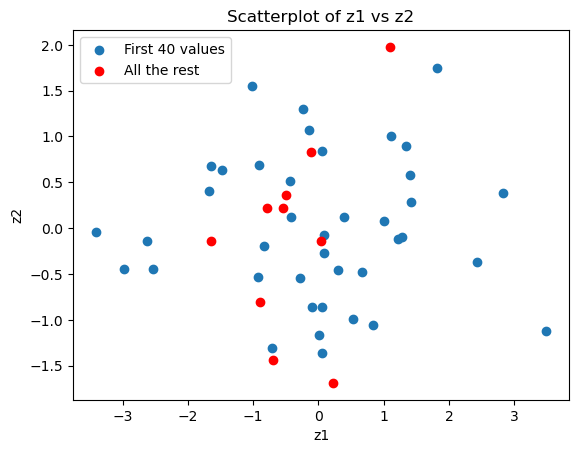

In [14]:
# Create a scatterplot with the first 40 values of the two scores 
plt.scatter(scores_df['z1'][:40], scores_df['z2'][:40], label='First 40 values')
# Add the rest of the values to the scatterplot with a different color
plt.scatter(scores_df['z1'][40:], scores_df['z2'][40:], color='r', label='All the rest')
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Scatterplot of z1 vs z2')
plt.legend()
plt.show()